In [1]:
# Predicting Survival in the Titanic Data Set
# We will be using a decision tree to make predictions about the Titanic data
# set from Kaggle. This data set provides information on the Titanic
# passengers and can be used to predict whether a passenger survived or
# not.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
url= "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
titanic = pd.read_csv(url)

In [4]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
titDf = titanic[["Pclass", 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
titDf

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,0
887,1,female,19.0,0,0,30.0000,1
888,3,female,NaN,1,2,23.4500,0
889,1,male,26.0,0,0,30.0000,1


In [7]:
titDf.shape

(891, 7)

In [8]:
titDf.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [9]:
titDf['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

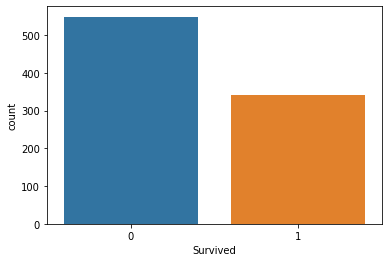

In [10]:
sb.countplot(titDf['Survived'], label="Survival count")

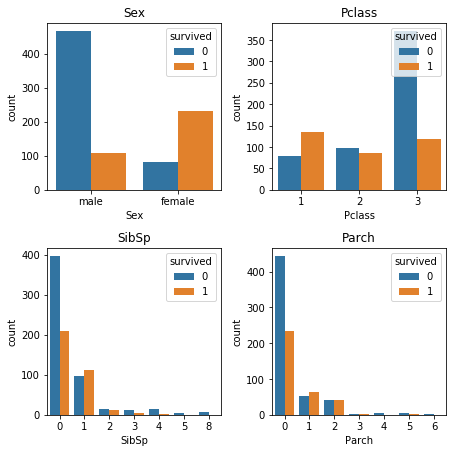

In [11]:
cols = ['Sex', 'Pclass', 'SibSp', 'Parch']

n_rows = 2
n_cols = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols*3.2,n_rows*3.2))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols+ c       
        ax = axs[r][c]
        sb.countplot(titDf[cols[i]], hue=titDf["Survived"], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="survived", loc='upper right') 
plt.tight_layout()

In [12]:
titDf.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64

In [13]:
titDf = titDf.dropna(subset=['Age'])
titDf.shape

(714, 7)

In [14]:
titDf['Survived'].value_counts()

0    424
1    290
Name: Survived, dtype: int64

In [15]:
titDf.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Survived      int64
dtype: object

In [16]:
print(titDf['Sex'].unique())

['male' 'female']


In [17]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
titDf.iloc[:,1] = labelEncoder.fit_transform(titDf.iloc[:,1].values)

C:\Users\syaam\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [18]:
print(titDf['Sex'].unique())

[1 0]


In [19]:
X = titDf.drop(['Survived'], axis=1)
Y = titDf['Survived']
titDf

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
885,3,0,39.0,0,5,29.1250,0
886,2,1,27.0,0,0,13.0000,0
887,1,0,19.0,0,0,30.0000,1
889,1,1,26.0,0,0,30.0000,1


In [20]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
885,3,0,39.0,0,5,29.1250
886,2,1,27.0,0,0,13.0000
887,1,0,19.0,0,0,30.0000
889,1,1,26.0,0,0,30.0000


In [21]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [23]:
from sklearn.tree import DecisionTreeClassifier
decTree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
decTree.fit(X_train, Y_train)

print('Accuracy:', decTree.score(X_test, Y_test))

Accuracy: 0.7902097902097902


In [24]:
import pickle
filename = 'Dec_tree_assignment.pickle'
pickle.dump(decTree, open(filename,'wb'))

In [25]:
loaded_model = pickle.load(open(filename,'rb'))

In [26]:
#Just passing the same input params from input dataset direct to the model
#And also compare whether the original predicted value and the value predicted by my model is same or nearly same 

In [27]:
count=0
for i in range (0, titDf.shape[0]):
    a = X.iloc[i].values.tolist()
    b = loaded_model.predict([a])
    print ("predicted dataset y val", b, "at index", i)
    if b==1:
        count += 1
print(count)

predicted dataset y val [0] at index 0
predicted dataset y val [1] at index 1
predicted dataset y val [1] at index 2
predicted dataset y val [1] at index 3
predicted dataset y val [0] at index 4
predicted dataset y val [0] at index 5
predicted dataset y val [0] at index 6
predicted dataset y val [1] at index 7
predicted dataset y val [1] at index 8
predicted dataset y val [1] at index 9
predicted dataset y val [1] at index 10
predicted dataset y val [0] at index 11
predicted dataset y val [0] at index 12
predicted dataset y val [0] at index 13
predicted dataset y val [1] at index 14
predicted dataset y val [0] at index 15
predicted dataset y val [0] at index 16
predicted dataset y val [0] at index 17
predicted dataset y val [0] at index 18
predicted dataset y val [1] at index 19
predicted dataset y val [1] at index 20
predicted dataset y val [0] at index 21
predicted dataset y val [1] at index 22
predicted dataset y val [0] at index 23
predicted dataset y val [0] at index 24
predicted 

predicted dataset y val [0] at index 324
predicted dataset y val [0] at index 325
predicted dataset y val [0] at index 326
predicted dataset y val [0] at index 327
predicted dataset y val [0] at index 328
predicted dataset y val [1] at index 329
predicted dataset y val [0] at index 330
predicted dataset y val [1] at index 331
predicted dataset y val [1] at index 332
predicted dataset y val [1] at index 333
predicted dataset y val [1] at index 334
predicted dataset y val [0] at index 335
predicted dataset y val [0] at index 336
predicted dataset y val [0] at index 337
predicted dataset y val [1] at index 338
predicted dataset y val [1] at index 339
predicted dataset y val [0] at index 340
predicted dataset y val [1] at index 341
predicted dataset y val [1] at index 342
predicted dataset y val [1] at index 343
predicted dataset y val [1] at index 344
predicted dataset y val [1] at index 345
predicted dataset y val [0] at index 346
predicted dataset y val [0] at index 347
predicted datase

predicted dataset y val [0] at index 651
predicted dataset y val [0] at index 652
predicted dataset y val [0] at index 653
predicted dataset y val [0] at index 654
predicted dataset y val [0] at index 655
predicted dataset y val [1] at index 656
predicted dataset y val [1] at index 657
predicted dataset y val [0] at index 658
predicted dataset y val [1] at index 659
predicted dataset y val [0] at index 660
predicted dataset y val [1] at index 661
predicted dataset y val [1] at index 662
predicted dataset y val [0] at index 663
predicted dataset y val [1] at index 664
predicted dataset y val [0] at index 665
predicted dataset y val [0] at index 666
predicted dataset y val [1] at index 667
predicted dataset y val [0] at index 668
predicted dataset y val [1] at index 669
predicted dataset y val [0] at index 670
predicted dataset y val [0] at index 671
predicted dataset y val [1] at index 672
predicted dataset y val [0] at index 673
predicted dataset y val [0] at index 674
predicted datase

In [28]:
indexOfDataToPassToModel = 713
a = X.iloc[indexOfDataToPassToModel].values.tolist()
b = loaded_model.predict([a])
print(a)
print ("original dataset y val", titDf['Survived'][indexOfDataToPassToModel])
print ("predicted dataset y val", b)

[3.0, 1.0, 32.0, 0.0, 0.0, 7.75]
original dataset y val 0
predicted dataset y val [0]
